In [11]:
import pandas as pd
import numpy as np
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
import glob

### Data loading and preprocessing

In [3]:
data_path = "/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/"
merged_df = []
for file_name in glob.glob(data_path+'*.csv'):
    print(file_name)
    df = pd.read_csv(file_name)
    merged_df.append(df)
df_racing = pd.concat(merged_df)
## Filter data only for Racing Game
df_racing = df_racing[df_racing['game_type'] == "tracking_test"]

/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P31.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day2.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P30.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day1.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P29.csv


#### Utility functions

In [4]:
from datetime import date
from datetime import datetime
'''
Calculate time difference in seconds between two time
Input: t1, t2
Return: time difference in seconds
'''
def time_diff(t1, t2):
    a = datetime.strptime(t1, '%Y-%m-%d %H:%M:%S.%f')
    b = datetime.strptime(t2, '%Y-%m-%d %H:%M:%S.%f')
    return (b - a).total_seconds() # in seconds

'''
Calculate age in the year fromate from DoB (if DoB present in the age column)
Input: born (in %Y-%m-%d format)
Return: Age (in Year)
'''
def calculate_age(born):
    if(not isinstance(born, str)):
        return int(born)
    born = datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [5]:
df_racing["age"] = df_racing.apply(lambda x: calculate_age(x.age), axis=1)
df_racing.columns

Index(['user_id', 'name', 'age', 'location', 'used_hand', 'study_id',
       'study_day', 'try_allowed', 'try_number', 'try_remaining',
       'study_start', 'study_end', 'game_type', 'star_time', 'end_time',
       'total_time', 'data'],
      dtype='object')

#### Data pre-processing

In [ ]:
import re
import datefinder
pattern = "':"
time_pattern = '%Y-%m-%d %H:%M:%S.%f'
def get_movement(data, name):
    data = data.replace("{", "(")
    data = data.replace("}", ")")
    data = data.replace("[, ", "[")
    data = "{" + data[1:-1] + "}"
    # print(datetime.strptime(data, pattern).date())
    # matches = datefinder.find_dates(data)            
    # for match in matches:
    #     print("match found ",match)
    # print(eval(data))
    index = [match.start() for match in re.finditer(pattern, data)]
    
    path = eval(data[index[0]+len(pattern):index[1]-len(", 'timeline")])
    timeline = data[index[1]+len(pattern):index[2]-len(", 'try_info")]
    timeline = timeline.replace(', ', '", "')
    timeline = timeline.replace('[', '["')
    timeline = timeline.replace(']', '"]')
    timeline = eval(timeline)
    hand = data[index[2]+len(pattern)+2:-2]
    return path, timeline, time_diff(timeline[0], timeline[-1]), hand

In [7]:
df_racing[["path", "time", "time_diff", "hand"]]  = df_racing.apply(lambda x: get_movement(x.data, x["name"]), axis=1, result_type="expand")

In [8]:
df_racing[["path", "time", "time_diff", "hand"]]

,path,time,time_diff,hand
2,"[(102.99996948242188, 585), (102.5, 587), (102...","[2023-06-20 15:08:18.4450, 2023-06-20 15:08:18...",21.461,Right#1
3,"[(131, 579), (141.00003051757812, 579), (144, ...","[2023-06-20 15:08:46.4710, 2023-06-20 15:08:46...",12.828,Right#2
4,"[(115.5, 595), (127.5, 595), (132.5, 595), (14...","[2023-06-20 15:09:03.3650, 2023-06-20 15:09:03...",9.096,Right#3
5,"[(107.5, 591.5), (114.5, 589), (120, 588), (12...","[2023-06-20 15:09:16.1290, 2023-06-20 15:09:16...",11.861,Left#4
6,"[(126.5, 565.5), (128.99996948242188, 565), (1...","[2023-06-20 15:09:30.4580, 2023-06-20 15:09:30...",11.727,Left#5
...,...,...,...,...
8,"[(940, 230.99998474121094), (944.5, 235.499984...","[2023-06-19 14:09:22.2710, 2023-06-19 14:09:22...",12.627,Right#7
9,"[(114, 571.5), (123.50003051757812, 574), (124...","[2023-06-19 14:09:38.5340, 2023-06-19 14:09:38...",11.259,Left#8
10,"[(81.5, 588.5), (84, 588.5), (96, 588.5), (111...","[2023-06-19 14:09:52.9270, 2023-06-19 14:09:52...",11.728,Right#9
11,"[(599, 387), (592.5, 387), (591, 387.5), (589....","[2023-06-19 14:10:07.5740, 2023-06-19 14:10:07...",10.977,Left#10


#### Get Baseline Path (x,y) Data

In [9]:
import pandas as pd
df = pd.read_csv("baseline.csv")
df_race = df.iloc[0]

In [10]:
def get_points(data):
    splited_data = data.split(",")
#     print(splited_data)
    x = []
    y = []
    x.append(float(splited_data[0][1:]))
    for i in range(1, len(splited_data)-1):
        p = splited_data[i].strip()
        p = p.split("}{")
        y.append(float(p[0]))
        x.append(float(p[1]))
    
    y.append(float(splited_data[-1][1:-2]))
#     print("X= ", x)
#     print("Y= ", y)
    return x, y

In [11]:
base_x, base_y = get_points(df_race["data"])

#### Plot first 6 tries of a participants data

In [13]:
df_race_test = df_racing.iloc[:6] 
df_race_test[["path", "time", "time_diff", "hand"]]

,path,time,time_diff,hand
2,"[(102.99996948242188, 585), (102.5, 587), (102...","[2023-06-20 15:08:18.4450, 2023-06-20 15:08:18...",21.461,Right#1
3,"[(131, 579), (141.00003051757812, 579), (144, ...","[2023-06-20 15:08:46.4710, 2023-06-20 15:08:46...",12.828,Right#2
4,"[(115.5, 595), (127.5, 595), (132.5, 595), (14...","[2023-06-20 15:09:03.3650, 2023-06-20 15:09:03...",9.096,Right#3
5,"[(107.5, 591.5), (114.5, 589), (120, 588), (12...","[2023-06-20 15:09:16.1290, 2023-06-20 15:09:16...",11.861,Left#4
6,"[(126.5, 565.5), (128.99996948242188, 565), (1...","[2023-06-20 15:09:30.4580, 2023-06-20 15:09:30...",11.727,Left#5
7,"[(157, 573), (160, 573), (160.50003051757812, ...","[2023-06-20 15:09:46.0190, 2023-06-20 15:09:46...",15.594,Left#6


In [14]:
hand = ["Right #1", "Right #2", "Right #3", "Left #1", "Left #2", "Left #3"]
df_race_test["hand_u"] = hand
df_race_test[["path", "time", "time_diff", "hand_u"]]

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_5731/3091526567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race_test["hand_u"] = hand


,path,time,time_diff,hand_u
2,"[(102.99996948242188, 585), (102.5, 587), (102...","[2023-06-20 15:08:18.4450, 2023-06-20 15:08:18...",21.461,Right #1
3,"[(131, 579), (141.00003051757812, 579), (144, ...","[2023-06-20 15:08:46.4710, 2023-06-20 15:08:46...",12.828,Right #2
4,"[(115.5, 595), (127.5, 595), (132.5, 595), (14...","[2023-06-20 15:09:03.3650, 2023-06-20 15:09:03...",9.096,Right #3
5,"[(107.5, 591.5), (114.5, 589), (120, 588), (12...","[2023-06-20 15:09:16.1290, 2023-06-20 15:09:16...",11.861,Left #1
6,"[(126.5, 565.5), (128.99996948242188, 565), (1...","[2023-06-20 15:09:30.4580, 2023-06-20 15:09:30...",11.727,Left #2
7,"[(157, 573), (160, 573), (160.50003051757812, ...","[2023-06-20 15:09:46.0190, 2023-06-20 15:09:46...",15.594,Left #3


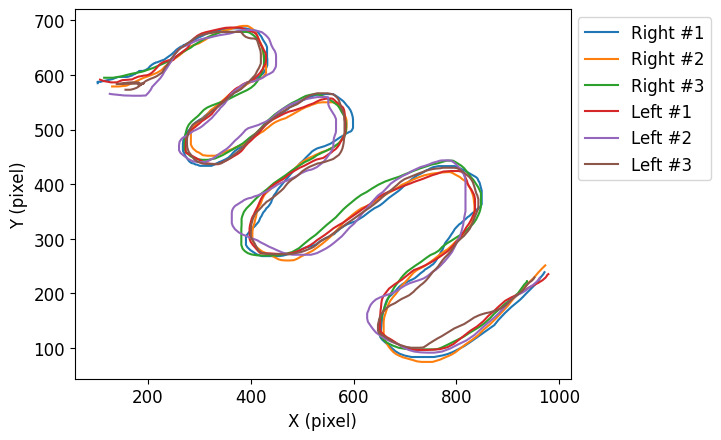

In [15]:
plt.rcParams.update({'font.size': 12})
# plt.rcParams["legend.loc"] = 'right'
dt=np.dtype('float,float')

for i, row in df_race_test.iterrows():
    points = np.array(row["path"],dtype=dt)
    x = points["f0"]  # X-axis points
    y = points["f1"]  # Y-axis points
    plt.plot(x, y, label=row["hand_u"])  # Plot the chart
    # j+=1
plt.xlabel('X (pixel)')
plt.ylabel('Y (pixel)')
# plt.title("Movement path of racing game")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1));
plt.show()  # display

### Calculate RMSE using the following steps
1. Construct criterion function, V (T, dy/dx) using fist-order derivative
2. Detect the K=12 breakpoints from the V using PELT method ('rbf' model)--Equation 3 optimized for Equation 4
3. Calculate the segment-wise (k) RMSE from the error distance and sum for each point in the path (x,y)-- Equation 5
![image](PELT_Method.png)

In [16]:
from numpy import diff
dydx = diff(base_y)/diff(base_x) ## First-order derivative signal of the movement path

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_5731/905783101.py:2: RuntimeWarning: divide by zero encountered in divide
  dydx = diff(base_y)/diff(base_x)


In [17]:
dydx[0:1000]

array([ 0.        ,  0.        ,  0.        , -0.25      , -0.2       ,
        0.        , -0.33333333,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.25000381,  0.66668023,  0.        ,  0.5       ,  0.25      ,
        0.25      ,  0.33332655,  0.        ,  0.        ,  0.33334012,
        0.33333333,  0.5       ,  0.25      ,  0.66666667,  1.00002035,
        0.24999619,  0.66666667,  0.33333333,  0.66668023,  0.6666531 ,
        0.33332655,  0.66669379,  1.99987794,  0.33334012,  0.49996948,
        0.33334012,  0.5       ,  0.25      ,  0.33333333,  1.        ,
        0.5       ,  0.50001526,  0.33332655,  1.        ,  0.33333333,
        0.5       ,  0.        ,  1.        ,  0.33333333,  0.49

(1819,)


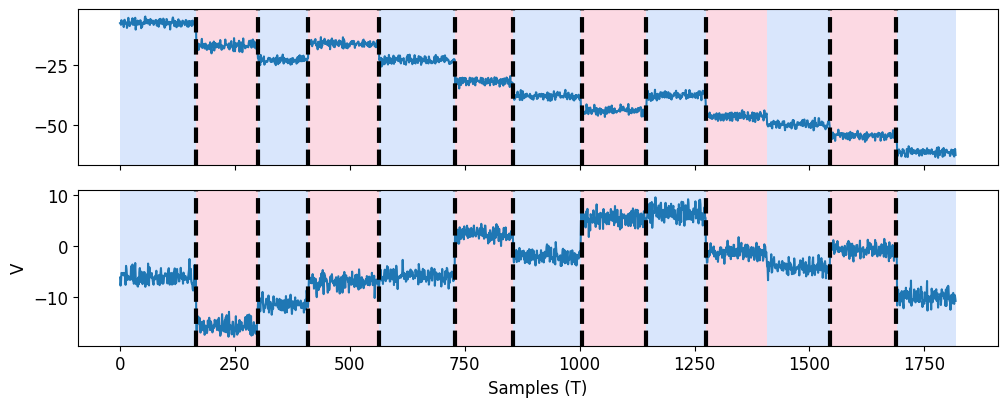

In [18]:
import matplotlib.pyplot as plt
import ruptures as rpt
t_array = np.array(dydx)
print(t_array.shape)
n_samples, dim, sigma = t_array.shape[0], 2, 1
n_bkps = 12  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

# display
rpt.display(signal, bkps, result)
plt.rcParams.update({'font.size': 16})
plt.ylabel('V')
plt.xlabel('Samples (T)')
plt.show()
# model = "l2" 
# rpt.Pelt(model="rbf").fit(signal)
# algo = rpt.Window(width=40, model=model).fit(t_array)
# result = algo.predict(n_bkps=12)

# # display
# rpt.display(t_array, result)

# plt.show()

In [19]:
break_points = []
threshold = 1
discontinuities_idx = np.where(abs(np.diff(dydx))>threshold)[0] + 1
# print(discontinuities_idx)
discontinuities_idx_ = np.where(abs(np.diff(discontinuities_idx))>25)[0] + 1
for i in discontinuities_idx_:
    break_points.append(discontinuities_idx[i])
break_points.append(len(base_x))
# break_points.append(0)
break_points

/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/motevanalysisenv/lib/python3.9/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]

#### Utility functions

In [20]:
import math
'''
Calculate distance between two points P1(x1, y1) and P2(x2, y2)
'''
def dist_btn_two_points(x1, y1, x2, y2):
    return math.hypot(x2 - x1, y2 - y1)
'''
Calculate perpendicular distance of a path from the ideal path
'''
def cal_perp_dist(path):
    points = np.array(path,dtype=dt)
    x = points["f0"]  # X-axis points
    y = points["f1"]  # Y-axis points
    min_dist = []
    print(len(x))
#     n = len(base_x)/N
    m = round(len(x)/len(break_points))
#     step = int(len(base_x)/len(x))
#     print(len(base_x), len(x), step)
#     print(m, n)
    indexs = []
    for s in range(0, len(break_points)+1):
        indexs.append(s*m)
    indexs = indexs[1:]
    print(break_points)
    print(indexs)
#     pivot_i = 0
#     pivot_j = step
    idx = 0
    for i in range(0, len(x)):
        dist = []
        for j in range(0, len(base_x)):
            dist.append(dist_btn_two_points(x[i], y[i], base_x[j], base_y[j]))
#         print(i, pivot_i, pivot_j, min(dist), min(dist[pivot_i:pivot_j]))
        for k in range(0, len(indexs)):
            if(i<indexs[k]):
                idx = k
                break
        if(idx==0):
            min_dist.append(min(dist[0:break_points[idx]])) ## Time series -> downsample
#             print(0, break_points[idx])
        else:
            min_dist.append(min(dist[break_points[idx-1]:break_points[idx]])) ## Time series -> downsample
#             print(break_points[idx-1], break_points[idx])
        
#         pivot_i = pivot_i + i
#         pivot_j = pivot_j + step
#     print(min_dist)
    return min_dist
'''
Calculate RMSE from Perpendicular distance
'''
def RMSE(perp_dist):
    se = sum(i*i for i in perp_dist)
    rmse = math.sqrt(se)/len(perp_dist)
    return rmse

In [21]:
df_race_test["error_dist"] = df_race_test.apply(lambda x: cal_perp_dist(x["path"]), axis=1)

639
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[49, 98, 147, 196, 245, 294, 343, 392, 441, 490, 539, 588, 637]
387
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]
275
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273]
359
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[28, 56, 84, 112, 140, 168, 196, 224, 252, 280, 308, 336, 364]
354
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[27, 54, 81, 108, 135, 162, 189, 216, 243, 270, 297, 324, 351]
456
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[35, 70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420, 455]


/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_5731/1091211564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race_test["error_dist"] = df_race_test.apply(lambda x: cal_perp_dist(x["path"]), axis=1)


In [22]:
df_race_test["rmse"] = df_race_test.apply(lambda x: RMSE(x.error_dist), axis=1)

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_5731/3067165425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race_test["rmse"] = df_race_test.apply(lambda x: RMSE(x.error_dist), axis=1)


In [23]:
x = df_race_test['hand_u'].tolist()
y_rmse = df_race_test['rmse'].tolist()
y_time = df_race_test['time_diff'].tolist()
y_rmse, y_time

([2.4816963409885324,
  5.977664703255913,
  10.012220896560615,
  6.763889045842674,
  6.281956729624965,
  6.0363224389427605],
 [21.461, 12.828, 9.096, 11.861, 11.727, 15.594])

#### Plot Error and completion time plot for a trial

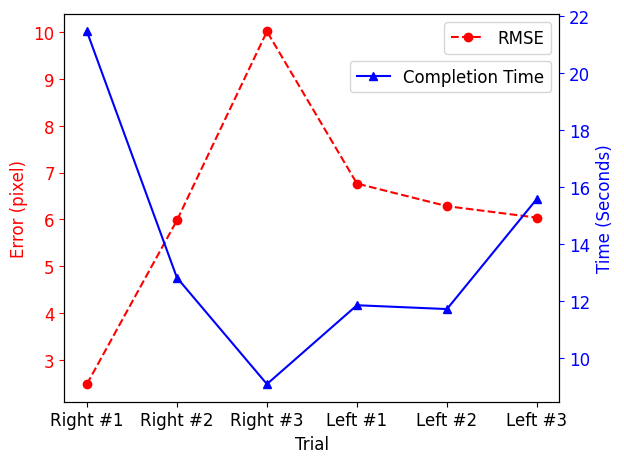

In [24]:
plt.rcParams.update({'font.size': 12})

fig, ax1 = plt.subplots()

ax1.plot(x, y_rmse, 'o--', label ='RMSE', color='r')
ax1.set_xlabel('Trial')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Error (pixel)', color='r')
ax1.tick_params('y', colors='r')
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))

ax2 = ax1.twinx()
ax2.plot(x, y_time, '^-', label ='Completion Time', color='b')
ax1.set_xlabel('Trial')
ax2.set_ylabel('Time (Seconds)', color='b')
# ax2.ylim(0,22)
ax2.tick_params('y', colors='b')
ax2.legend(loc='upper right', bbox_to_anchor=(1, .9))

fig.tight_layout()


# plt.plot(x, y_rmse, 'o--', label ='Completion Time')
# plt.plot(x, y_time, '^-', label ='RMSE')
# plt.tick_params(labeltop=False, labelright=True)
# plt.xlabel("Trial")
# plt.ylabel("Error (pixel)")
# plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# # plt.title('multiple plots')
# plt.show()

### Age Correaltion Analysis using Pearson correlation

#### Calculate the RMSE for all trials data

In [25]:
df_racing["error_dist"] = df_racing.apply(lambda x: cal_perp_dist(x["path"]), axis=1)
df_racing["rmse"] = df_racing.apply(lambda x: RMSE(x.error_dist), axis=1)

639
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[49, 98, 147, 196, 245, 294, 343, 392, 441, 490, 539, 588, 637]
387
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]
275
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273]
359
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[28, 56, 84, 112, 140, 168, 196, 224, 252, 280, 308, 336, 364]
354
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[27, 54, 81, 108, 135, 162, 189, 216, 243, 270, 297, 324, 351]
456
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[35, 70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420, 455]
416
[144, 252, 310, 587, 820, 849, 996, 1048, 1251, 1402, 1520, 1664, 1820]
[32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416]
399
[144, 252, 310, 587, 8

#### Data preparation for correlation analysis

In [26]:
df_corr = df_racing[["age", "time_diff", "rmse"]]
df_corr = df_corr[(df_corr['age'] < 14.0) & (df_corr['age'] >=4.0)]
df_corr.columns = ['Age(y/o)', 'Completion Time (Sec)', 'RMSE']
df_corr

,Age(y/o),Completion Time (Sec),RMSE
2,12,21.461,2.481696
3,12,12.828,5.977665
4,12,9.096,10.012221
5,12,11.861,6.763889
6,12,11.727,6.281957
...,...,...,...
8,8,12.627,9.281471
9,8,11.259,9.300459
10,8,11.728,8.584974
11,8,10.977,9.672444


In [27]:
df_corr = df_corr.reset_index(drop=True)

In [28]:
df_corr_outlier = df_corr[((df_corr["RMSE"]>8.0) &  (df_corr["Completion Time (Sec)"]>10.0)) | ((df_corr["RMSE"]>6.5) &  (df_corr["Completion Time (Sec)"]>18.0))]
outlier_index = df_corr_outlier.index.values.tolist()
## Remove outlier
df_corr = df_corr.drop(index=outlier_index)
df_corr

,Age(y/o),Completion Time (Sec),RMSE
0,12,21.461,2.481696
1,12,12.828,5.977665
2,12,9.096,10.012221
3,12,11.861,6.763889
4,12,11.727,6.281957
...,...,...,...
62,9,21.345,1.317507
63,9,19.686,2.962409
64,8,22.312,3.726744
65,8,13.724,2.827562


#### Speed-Accuracy Tradeoff

Text(0, 0.5, 'Accuracy (RMSE)')

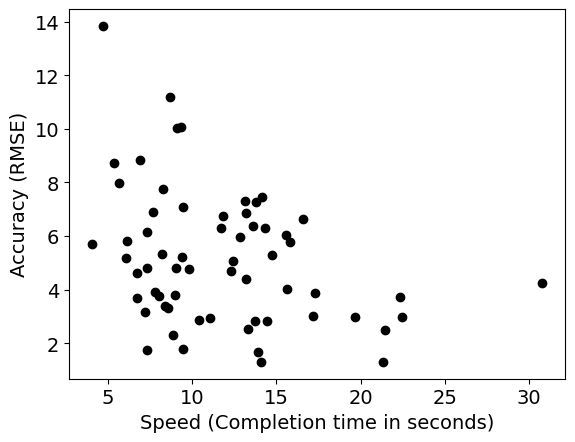

In [29]:
plt.rcParams.update({'font.size': 14})
plt.scatter(df_corr["Completion Time (Sec)"], df_corr["RMSE"], color= 'black')
plt.xlabel("Speed (Completion time in seconds)")
plt.ylabel("Accuracy (RMSE)")

#### Quadric curve fitting

(3.043, 31.791)

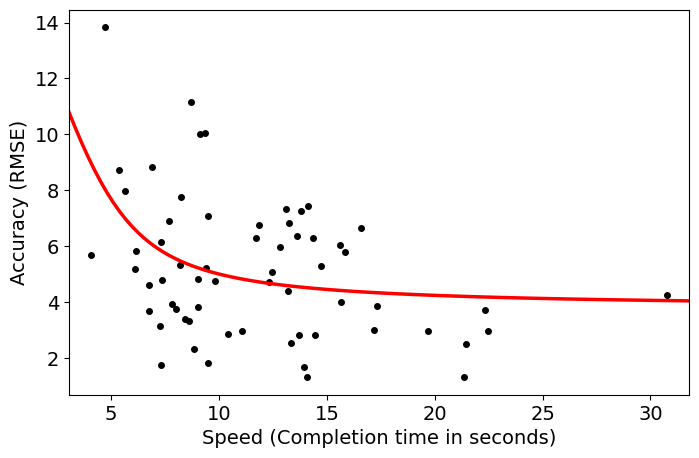

In [30]:
from biofits import fit_hyperbola, hyperbola, fit_quadratic, quadratic

concentrations = np.array(df_corr["Completion Time (Sec)"])
fluorescence = np.array(np.array(df_corr["RMSE"]))

# perform the fit
yint, yint_stddev, delta_y, delta_y_stddev, kd, kd_stddev, constant, constant_stddev = fit_quadratic(concentrations, fluorescence)

# create the fit curve, just for plotting
x = np.linspace(min(concentrations)-1,max(concentrations)+1, 100)
y = quadratic(x, yint, delta_y, kd, constant)

# plot the results
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,5))
plt.plot(x,y, label='fit', zorder=1, color="r", linewidth=2.5)
plt.plot(concentrations, fluorescence, 'o', label='data', color='black', markersize=4, zorder=0)
# plt.text(50, 6, "$k_{d}=%.1f \pm %.1f\ nM$" % (kd, kd_stddev), fontsize=18)
# plt.text(50, 5.2, "$[L]=%.1f \pm %.1f\ nM$" % (constant, constant_stddev), fontsize=18)
# plt.suptitle("Quadratic Fit", fontsize=18)
plt.xlabel("Speed (Completion time in seconds)")
plt.ylabel("Accuracy (RMSE)")
plt.xlim(min(concentrations)-1,max(concentrations)+1)

#### Pearson Correlation functions and plot

In [31]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,8))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)
    
def plot_data_corr(df,title,color="green"):    
    r = display_correlation(df)
    fig, ax = plt.subplots(nrows=1, ncols=len(df.columns)-1,figsize=(14,6))
    for i in range(1,len(df.columns)):
        ax[i-1].scatter(df["object_code"],df.values[:,i],color=color)
        ax[i-1].title.set_text(title[i] +'\n r = ' + 
                             "{:.2f}".format(r.values[0,i]))
        ax[i-1].set(xlabel=df.columns[0],ylabel=df.columns[i])
    fig.subplots_adjust(wspace=.9)    
    plt.show()

def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="red")
    # g.map_lower(sns.scatterplot,color="black")
    g.map_lower(sns.boxplot,color="black")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()  

In [32]:
df_corr

,Age(y/o),Completion Time (Sec),RMSE
0,12,21.461,2.481696
1,12,12.828,5.977665
2,12,9.096,10.012221
3,12,11.861,6.763889
4,12,11.727,6.281957
...,...,...,...
62,9,21.345,1.317507
63,9,19.686,2.962409
64,8,22.312,3.726744
65,8,13.724,2.827562


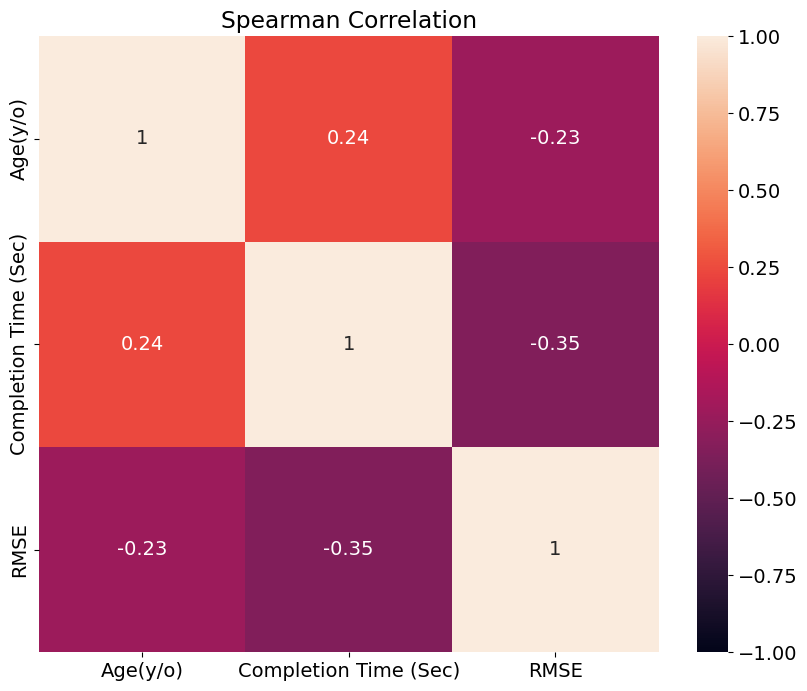

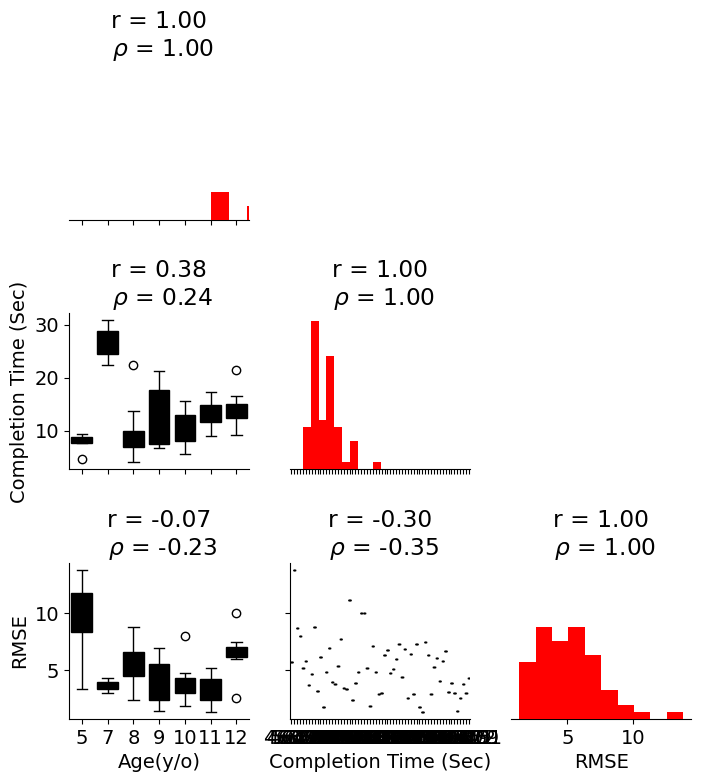

In [33]:
display_corr_pairs(df_corr)

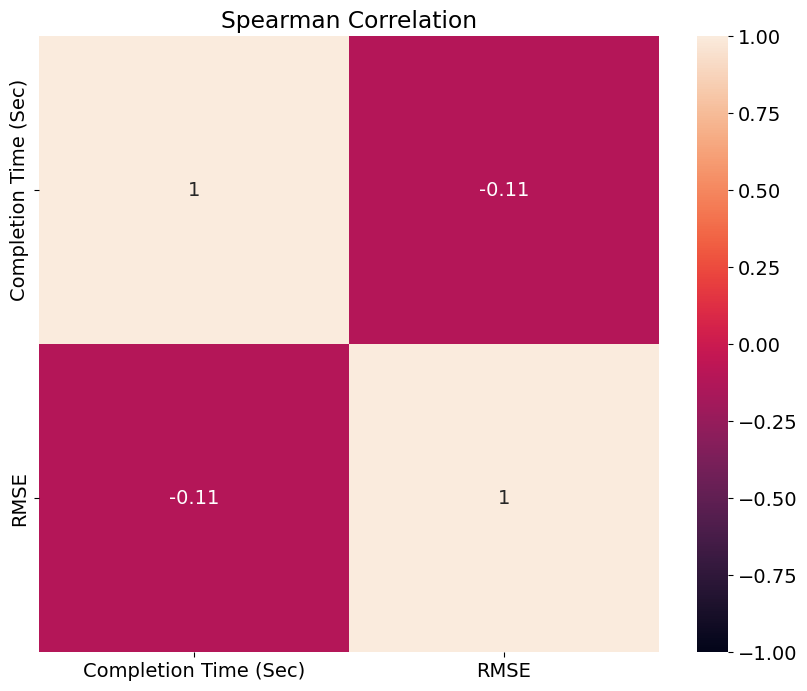

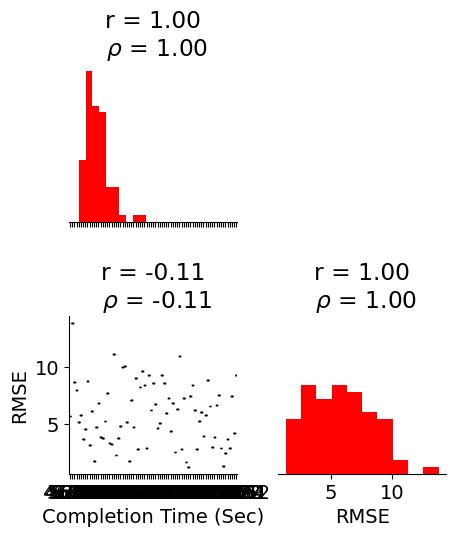

In [32]:
display_corr_pairs(df_corr[["Completion Time (Sec)", "RMSE"]])